# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [19]:
#import libabries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix


import warnings 
warnings.filterwarnings('ignore')

In [2]:
fraud_data=pd.read_csv(r"D:\Excelr\assignments\decision trees\Fraud_check.csv")
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_data.duplicated().sum()

0

In [6]:
fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [7]:
corr=fraud_data.corr()
corr


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

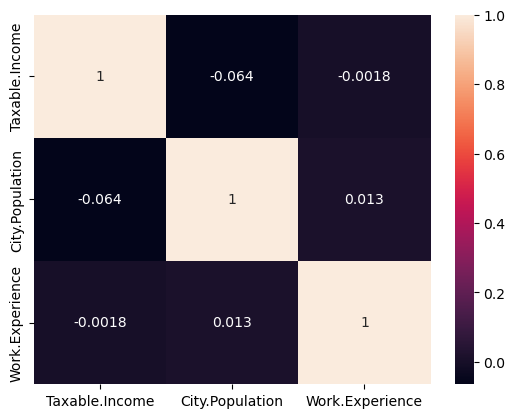

In [8]:
sns.heatmap(corr,annot=True)


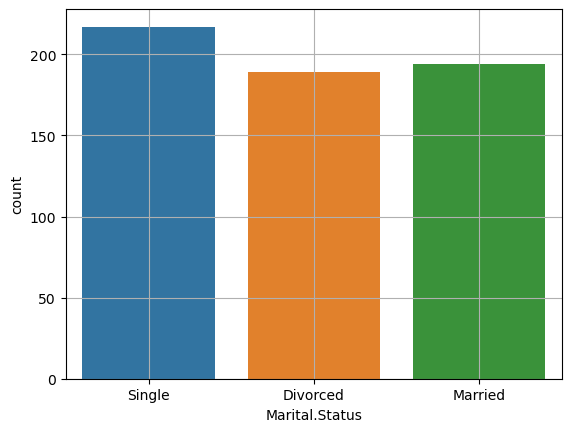

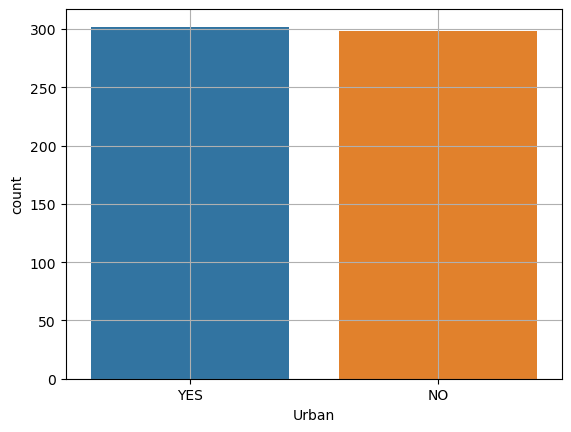

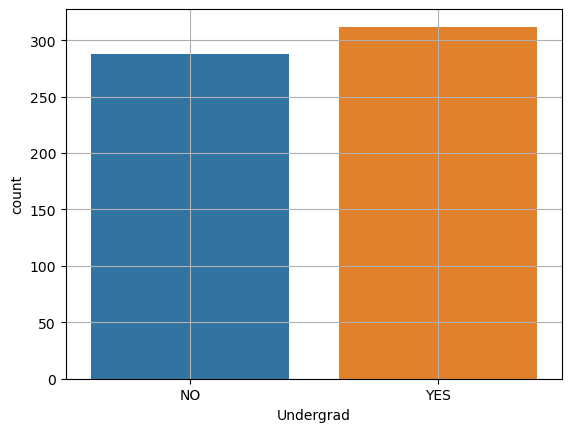

In [9]:
sns.countplot(x='Marital.Status',data=fraud_data)
plt.grid(True)
plt.show()

sns.countplot(x='Urban',data=fraud_data)
plt.grid(True)
plt.show()

sns.countplot(x='Undergrad',data=fraud_data)
plt.grid(True)
plt.show()

## Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [10]:
print('min value:',fraud_data['Taxable.Income'].min(),'\n max value:',fraud_data['Taxable.Income'].max())

min value: 10003 
 max value: 99619


In [11]:
#Converting Target variable 'Sales' into categories Low, Medium and High
fraud_data['Taxable.Income']=pd.cut(x=fraud_data['Taxable.Income'],bins=[10002,30000,99620],labels=['Risky','Good'])
fraud_data['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [12]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


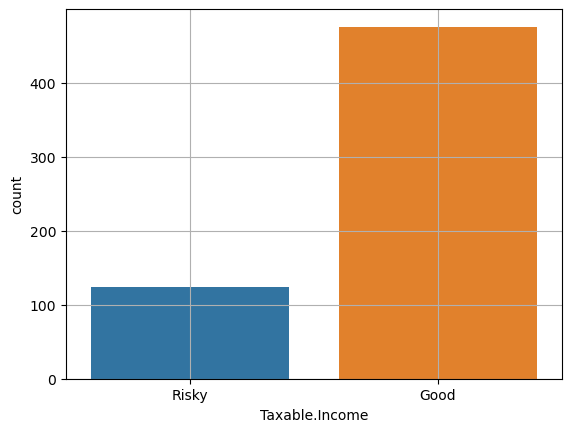

In [14]:
sns.countplot(fraud_data['Taxable.Income'])
plt.grid()
plt.show()

In [17]:
fraud_data['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [29]:
#encoding categorical fraud_data
label_encoder=preprocessing.LabelEncoder()
fraud_data['Undergrad']=label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Taxable.Income']=label_encoder.fit_transform(fraud_data['Taxable.Income'])
fraud_data['Marital.Status']=label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban']=label_encoder.fit_transform(fraud_data['Urban'])

fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [31]:
fraud_data['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

## Data Preperation

In [37]:
x=fraud_data.drop('Taxable.Income',axis=1)
y=fraud_data[['Taxable.Income']]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=12)

## Building Decision Tree Classifier using Entropy Criteria

In [41]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

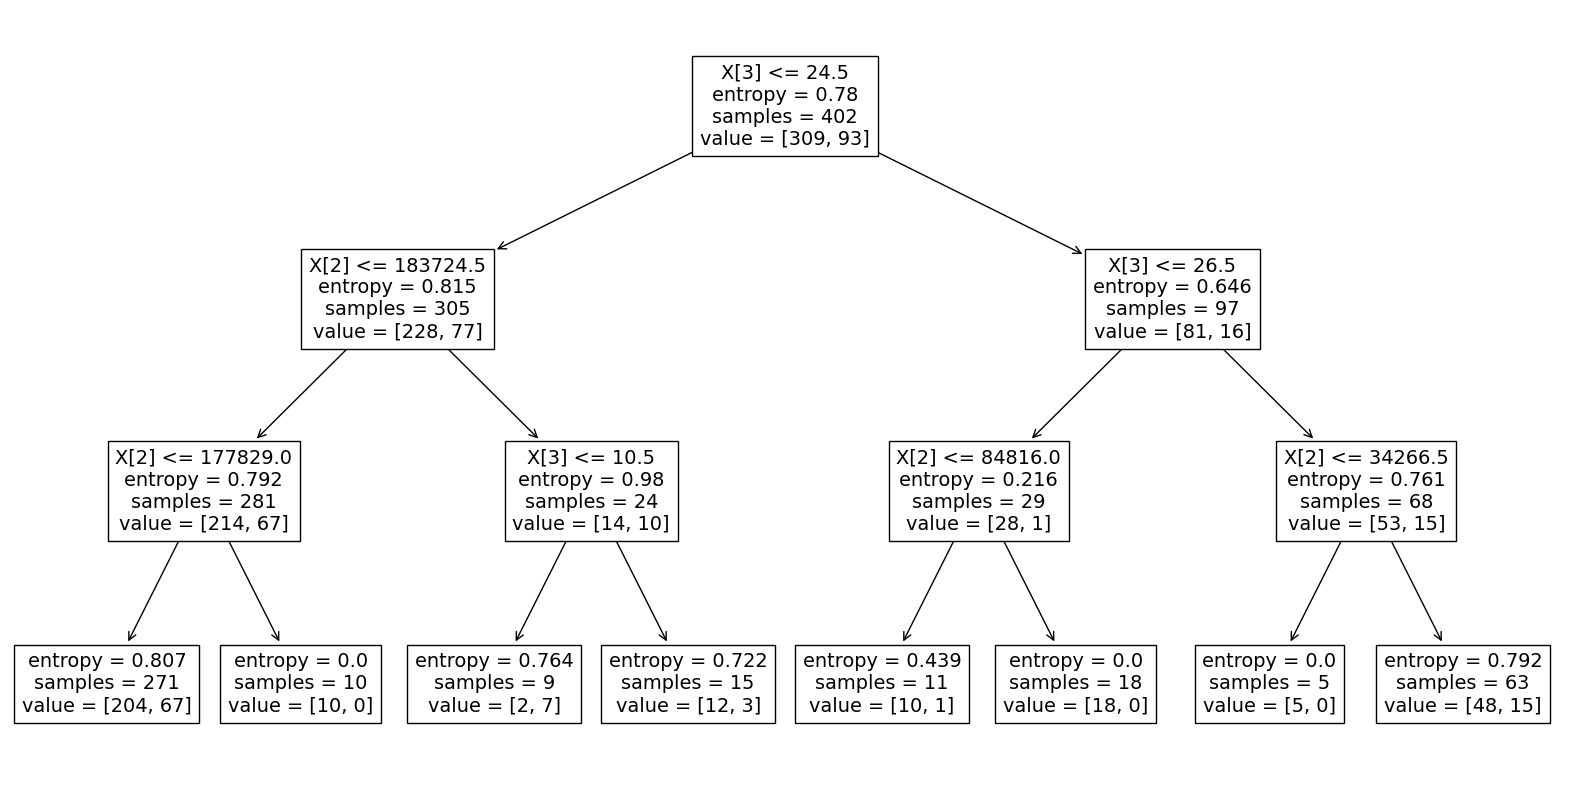

In [47]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model)
plt.show()

In [49]:
#preciction on test data
y_pred_test=dt_model.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [51]:
#accuracy score
print('Accuracy is:',accuracy_score(y_test,y_pred_test))

Accuracy is: 0.8181818181818182


In [52]:
confusion_matrix(y_test,y_pred_test)

array([[162,   5],
       [ 31,   0]], dtype=int64)

## Building Decision Tree Classifier using Gini Criteria

In [55]:
dt_model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
dt_model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

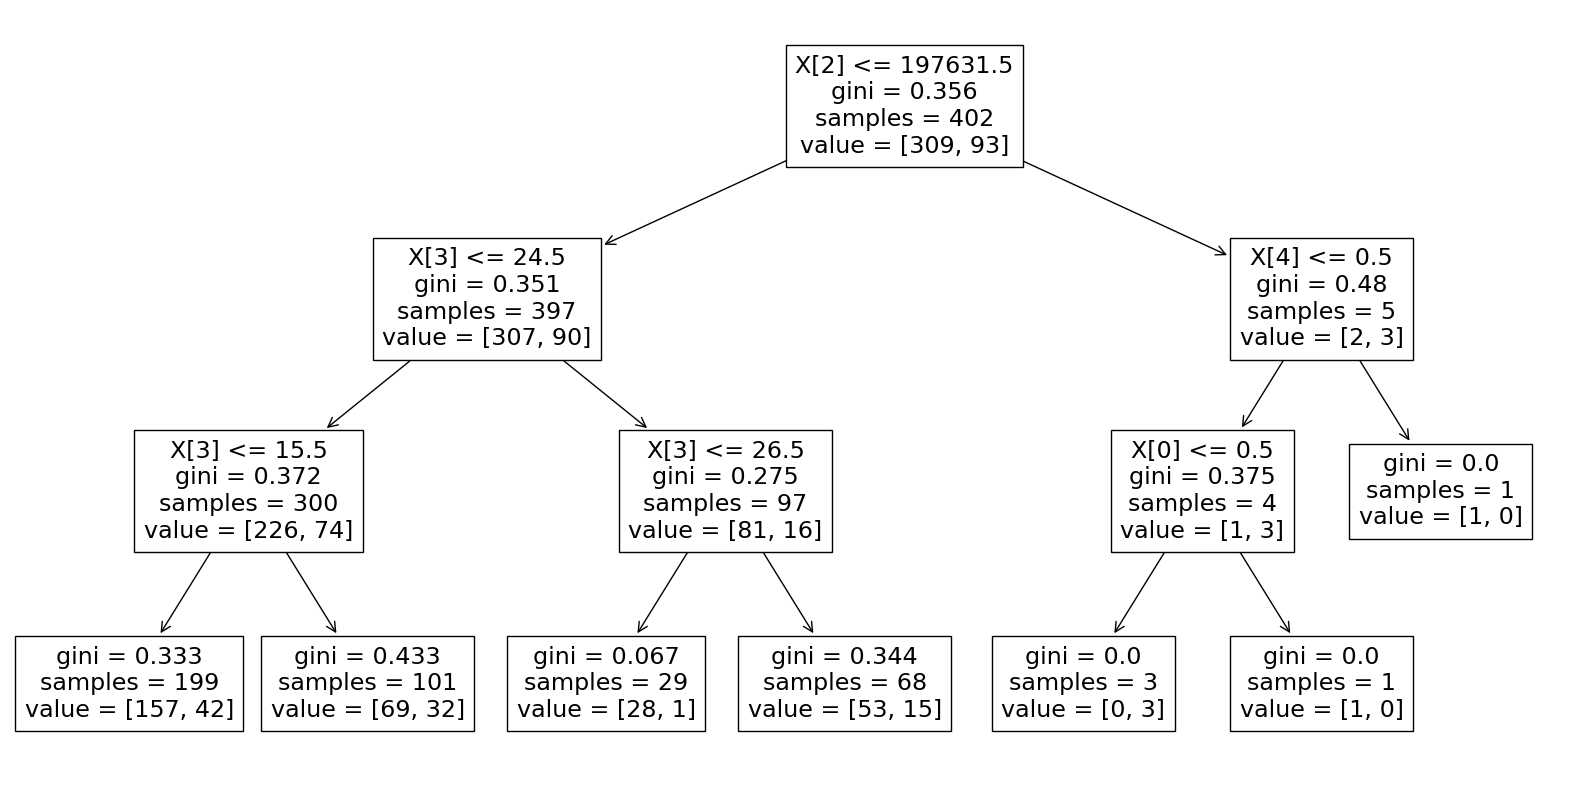

In [59]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model_gini)
plt.show()

In [62]:
y_pred_test_g=dt_model_gini.predict(x_test)
y_pred_test_g

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [63]:
print('Accuracy is:',accuracy_score(y_test,y_pred_test_g))

Accuracy is: 0.8434343434343434


In [65]:
#confusion matrix
confusion_matrix(y_test,y_pred_test_g)

array([[167,   0],
       [ 31,   0]], dtype=int64)

## Conclusion:
#### when we use 'entropy' criterion and max_depth=3 we get 81% accuracy of the model.
#### while when we use 'gini' criterion and max_depth=3 we get 84% accuracy of the model.